# Library & Dataset Import

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df1 = pd.read_csv("adverse_drug_reactions_data.csv")
df2 = pd.read_csv("drug_information_data.csv")
df3 = pd.read_csv("patient_demographics_data.csv")

# Exploratory Data Analysis (EDA)

In [95]:
df1

,Reaction_ID,Patient_ID,Drug_ID,Reaction_Type,Severity_Level,Date_of_Reaction,Duration_Days,Outcome,Reported_By
0,R00000001,P00043704,D00000015,Vomiting,Severe,14-08-21,24,Fatal,Michael Reilly
1,R00000002,P00003998,D00000014,Rash,Severe,21-05-24,6,Resolved,Oscar Jackson
2,R00000003,P00015899,D00000024,Fatigue,Severe,03-02-22,23,Fatal,Brandon Porter
3,R00000004,P00043136,D00000013,Vomiting,Severe,06-03-22,19,Fatal,Stacy Smith
4,R00000005,P00049637,D00000009,Headache,Severe,02-10-21,24,Fatal,Alicia Hudson
...,...,...,...,...,...,...,...,...,...
99995,R00099996,P00047498,D00000027,Rash,Mild,19-03-21,17,Resolved,Dustin Lopez
99996,R00099997,P00005569,D00000036,Headache,Mild,01-02-22,14,Fatal,Lawrence Frost
99997,R00099998,P00015640,D00000020,Dizziness,Mild,02-09-22,21,Resolved,Jonathon Valencia
99998,R00099999,P00028261,D00000008,Headache,Mild,18-04-22,2,Fatal,Kristen Bartlett


In [96]:
df1.columns

Index(['Reaction_ID', 'Patient_ID', 'Drug_ID', 'Reaction_Type',
       'Severity_Level', 'Date_of_Reaction', 'Duration_Days', 'Outcome',
       'Reported_By'],
      dtype='object')

In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Reaction_ID       100000 non-null  object
 1   Patient_ID        100000 non-null  object
 2   Drug_ID           100000 non-null  object
 3   Reaction_Type     100000 non-null  object
 4   Severity_Level    100000 non-null  object
 5   Date_of_Reaction  100000 non-null  object
 6   Duration_Days     100000 non-null  int64 
 7   Outcome           100000 non-null  object
 8   Reported_By       100000 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.9+ MB


In [98]:
df1['Date_of_Reaction'] = pd.to_datetime(df1['Date_of_Reaction'])

C:\Users\athrv\AppData\Local\Temp\ipykernel_6488\569430583.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Date_of_Reaction'] = pd.to_datetime(df1['Date_of_Reaction'])


In [99]:
df1.nunique()

Reaction_ID         100000
Patient_ID           43253
Drug_ID                 50
Reaction_Type            7
Severity_Level           3
Date_of_Reaction      1698
Duration_Days           29
Outcome                  3
Reported_By          71201
dtype: int64

In [100]:
df1.describe()

,Date_of_Reaction,Duration_Days
count,100000,100000.000000
mean,2022-05-04 19:53:51.648000,14.971850
min,2020-01-01 00:00:00,1.000000
25%,2021-03-04 00:00:00,8.000000
50%,2022-05-03 00:00:00,15.000000
75%,2023-06-30 00:00:00,22.000000
max,2024-12-08 00:00:00,29.000000
std,NaN,8.371592


In [101]:
df1.describe(include="object")

,Reaction_ID,Patient_ID,Drug_ID,Reaction_Type,Severity_Level,Outcome,Reported_By
count,100000,100000,100000,100000,100000,100000,100000
unique,100000,43253,50,7,3,3,71201
top,R00099984,P00046144,D00000046,Headache,Severe,Fatal,Michael Smith
freq,1,10,2096,28974,48191,33496,51


In [102]:
df2

,Drug_ID,Drug_Name,Drug_Class,Useful_For,Manufacturer,Approval_Date,Dosage_Form,Side_Effects
0,D00000001,Report,Drug_Class_7,Heart,Kelly and Sons,29-09-22,Syrup,Tend thing leg class maybe artist.
1,D00000002,Sell,Drug_Class_8,Kidney,"Tanner, Green and Mcgrath",29-07-22,Cream,Reduce which necessary listen enjoy hit articl...
2,D00000003,Industry,Drug_Class_5,Body Pain,Black Ltd,11-04-22,Cream,Pay player at news ten officer compare if gove...
3,D00000004,Summer,Drug_Class_6,Burn injuries,"Harding, Vasquez and Wright",25-09-20,Injection,Learn this across magazine fall a quality rath...
4,D00000005,Character,Drug_Class_2,Head Pain,Steele and Sons,03-12-23,Capsule,Manager out audience this spring whole practic...
5,D00000006,Back,Drug_Class_9,Fever,Boyd-Williams,09-06-20,Tablet,Finish too partner we positive common move iss...
6,D00000007,Part,Drug_Class_5,Body Pain,"Schmidt, Jones and Castro",14-03-23,Capsule,Investment technology large themselves build m...
7,D00000008,Piece,Drug_Class_6,Burn injuries,"Meyer, Gray and Cherry",21-04-24,Cream,Social air recognize instead head recently har...
8,D00000009,Dog,Drug_Class_9,Fever,"Hudson, Powers and Poole",29-09-21,Tablet,Billion range another defense treatment small ...
9,D00000010,Pressure,Drug_Class_3,Eyes Pain,"Tate, Cannon and Bryant",07-06-20,Capsule,North kind happen cover performance land new m...


In [103]:
df2.columns

Index(['Drug_ID', 'Drug_Name', 'Drug_Class', 'Useful_For', 'Manufacturer',
       'Approval_Date', 'Dosage_Form', 'Side_Effects'],
      dtype='object')

In [104]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Drug_ID        50 non-null     object
 1   Drug_Name      50 non-null     object
 2   Drug_Class     50 non-null     object
 3   Useful_For     50 non-null     object
 4   Manufacturer   50 non-null     object
 5   Approval_Date  50 non-null     object
 6   Dosage_Form    50 non-null     object
 7   Side_Effects   50 non-null     object
dtypes: object(8)
memory usage: 3.3+ KB


In [105]:
df2['Approval_Date'] = pd.to_datetime(df2['Approval_Date'])

C:\Users\athrv\AppData\Local\Temp\ipykernel_6488\2351837537.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Approval_Date'] = pd.to_datetime(df2['Approval_Date'])


In [106]:
df2.nunique()

Drug_ID          50
Drug_Name        50
Drug_Class       10
Useful_For       10
Manufacturer     50
Approval_Date    48
Dosage_Form       5
Side_Effects     50
dtype: int64

In [107]:
df2.describe()

,Approval_Date
count,50
mean,2022-06-21 15:50:24
min,2020-07-06 00:00:00
25%,2021-05-01 18:00:00
50%,2022-07-20 12:00:00
75%,2023-05-27 06:00:00
max,2024-12-02 00:00:00


In [108]:
df2.describe(include="object")

,Drug_ID,Drug_Name,Drug_Class,Useful_For,Manufacturer,Dosage_Form,Side_Effects
count,50,50,50,50,50,50,50
unique,50,50,10,10,50,5,50
top,D00000001,Report,Drug_Class_9,Fever,Kelly and Sons,Cream,Tend thing leg class maybe artist.
freq,1,1,9,9,1,11,1


In [109]:
df3

,Patient_ID,Name,Age_Group,Gender,Contact,Address,Date_of_Birth
0,P00000001,Oscar Contreras,36-45,Female,339.417.1457x0965,"533 Sara Wells Suite 155\nMelissaport, SC 48903",04-06-52
1,P00000002,Peter Little,18-25,Male,+1-795-899-7930x83040,"57253 Norton Trafficway\nJessicamouth, CO 73448",15-01-70
2,P00000003,Brandon Salas,46-60,Male,001-250-351-0742,"69841 Burns Spurs Apt. 352\nSouth Robert, WV 2...",15-08-64
3,P00000004,Ms. Audrey Walton,26-35,Female,001-311-215-5513x31299,"699 Glenn Street\nSoniaview, AL 96761",08-02-73
4,P00000005,Michael Hall,60+,Male,441.879.6288,"176 David Drive\nNew Javierton, SC 48007",25-10-47
...,...,...,...,...,...,...,...
49995,P00049996,Austin Fisher,60+,Female,(964)486-0503x42460,USS Wolfe\nFPO AA 54815,01-11-70
49996,P00049997,Johnny Henry,18-25,Female,001-326-865-0045x64688,"667 Kidd Radial Suite 052\nAutumnfort, MH 63427",21-02-47
49997,P00049998,Charles Allen,36-45,Female,9675477583,"88633 Laura Knoll Apt. 075\nPalmerhaven, VI 68388",04-12-96
49998,P00049999,Crystal Jackson,36-45,Female,+1-513-679-4932x2214,"804 Ashley Summit Apt. 953\nAmystad, VI 66376",09-03-06


In [110]:
df3.columns

Index(['Patient_ID', 'Name', 'Age_Group', 'Gender', 'Contact', 'Address',
       'Date_of_Birth'],
      dtype='object')

In [111]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Patient_ID     50000 non-null  object
 1   Name           50000 non-null  object
 2   Age_Group      50000 non-null  object
 3   Gender         50000 non-null  object
 4   Contact        50000 non-null  object
 5   Address        50000 non-null  object
 6   Date_of_Birth  50000 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB


In [112]:
df3['Date_of_Birth'] = pd.to_datetime(df3['Date_of_Birth'])

C:\Users\athrv\AppData\Local\Temp\ipykernel_6488\1745476226.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3['Date_of_Birth'] = pd.to_datetime(df3['Date_of_Birth'])


In [113]:
df3.nunique()

Patient_ID       50000
Name             40109
Age_Group            5
Gender               2
Contact          49813
Address          50000
Date_of_Birth    20445
dtype: int64

In [114]:
df3.describe()

,Date_of_Birth
count,50000
mean,2024-12-27 08:11:04.128000256
min,1975-01-01 00:00:00
25%,1990-10-25 00:00:00
50%,2006-08-24 00:00:00
75%,2059-04-18 18:00:00
max,2074-12-31 00:00:00


In [115]:
df3.describe(include=object)

,Patient_ID,Name,Age_Group,Gender,Contact,Address
count,50000,50000,50000,50000,50000,50000
unique,50000,40109,5,2,49813,50000
top,P00049984,Michael Smith,60+,Female,-7877,81848 Williamson Trafficway Apt. 232\nRamirezb...
freq,1,22,10157,38126,4,1


Merging Datasets

In [116]:
dfaddi = pd.merge(df1, df2, on='Drug_ID', how='inner')
dfaddi = pd.merge(df1, df2, on='Drug_ID', how='inner')
dfadpd = pd.merge(df1, df3, on='Patient_ID', how='inner')

In [117]:
dfaddi.columns

Index(['Reaction_ID', 'Patient_ID', 'Drug_ID', 'Reaction_Type',
       'Severity_Level', 'Date_of_Reaction', 'Duration_Days', 'Outcome',
       'Reported_By', 'Drug_Name', 'Drug_Class', 'Useful_For', 'Manufacturer',
       'Approval_Date', 'Dosage_Form', 'Side_Effects'],
      dtype='object')

In [135]:
dfadpd.columns

Index(['Reaction_ID', 'Patient_ID', 'Drug_ID', 'Reaction_Type',
       'Severity_Level', 'Date_of_Reaction', 'Duration_Days', 'Outcome',
       'Reported_By', 'Name', 'Age_Group', 'Gender', 'Contact', 'Address',
       'Date_of_Birth'],
      dtype='object')

# BASIC ANALYSIS

C:\Users\athrv\AppData\Local\Temp\ipykernel_6488\3217136854.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, y='Reaction_Type', order=df1['Reaction_Type'].value_counts().index,palette='mako')


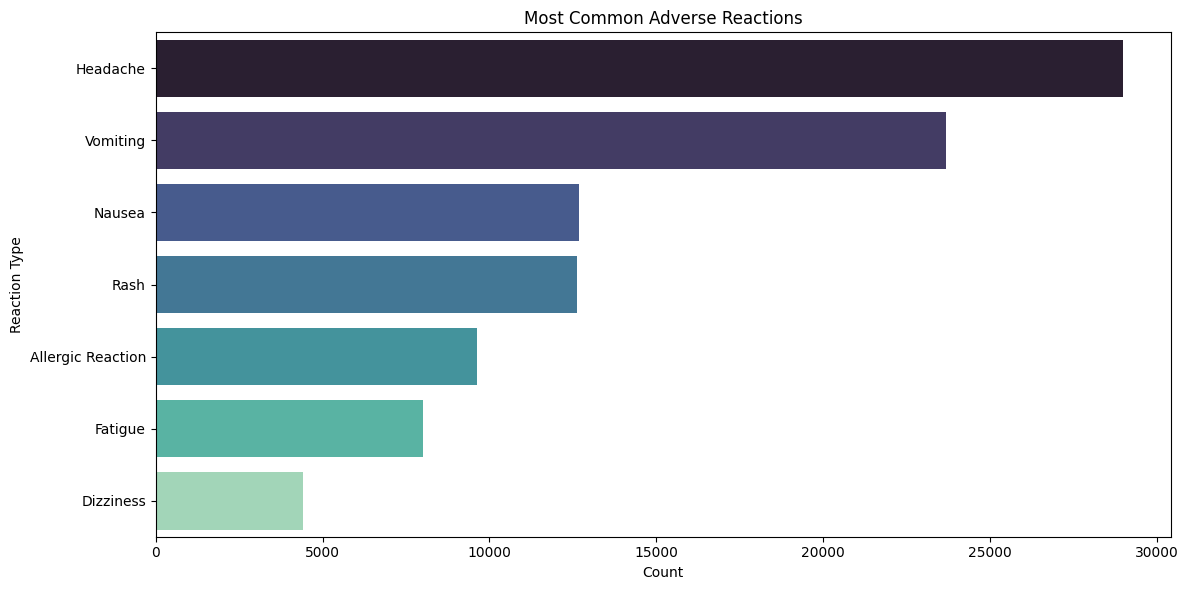

In [119]:
# MOST COMMON REACTIONS WITH HIGHER NUMBER OF PATIENT

plt.figure(figsize=(12, 6))
color=sns.color_palette("Purples")
sns.countplot(data=df1, y='Reaction_Type', order=df1['Reaction_Type'].value_counts().index,palette='mako')
plt.title('Most Common Adverse Reactions')
plt.xlabel('Count') 
plt.ylabel('Reaction Type')
plt.tight_layout()
plt.show()

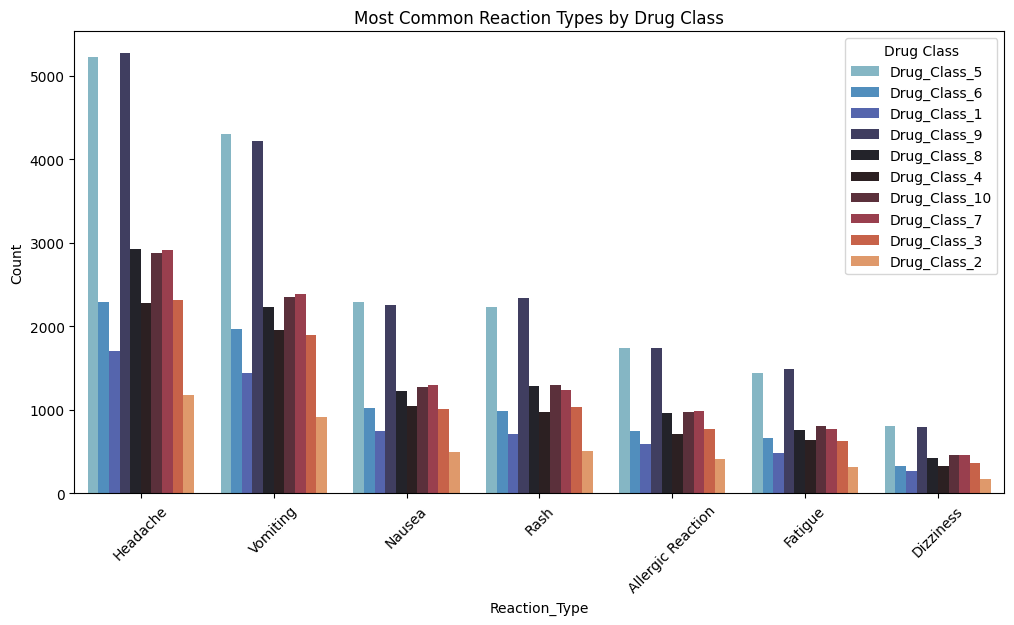

In [120]:
# MOST USED DRUGS ACCORDING TO THEIR CLASSES WITH COMMON REACTION TYPE

plt.figure(figsize=(12, 6))
sns.countplot(data=dfaddi, x='Reaction_Type', hue='Drug_Class', order=dfaddi['Reaction_Type'].value_counts().index, palette="icefire")
plt.title('Most Common Reaction Types by Drug Class')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Drug Class')
plt.show()

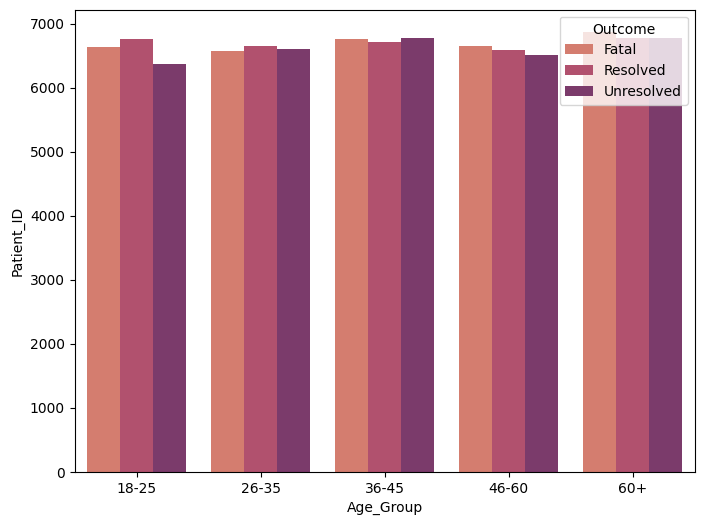

In [121]:
# FINAL OUTCOME RESULT ACCORDING TO AGE CATEGORY

data=dfadpd.groupby(["Age_Group","Outcome"]).agg({"Patient_ID":"count"})
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=data, x="Age_Group", y="Patient_ID", palette="flare",hue="Outcome")

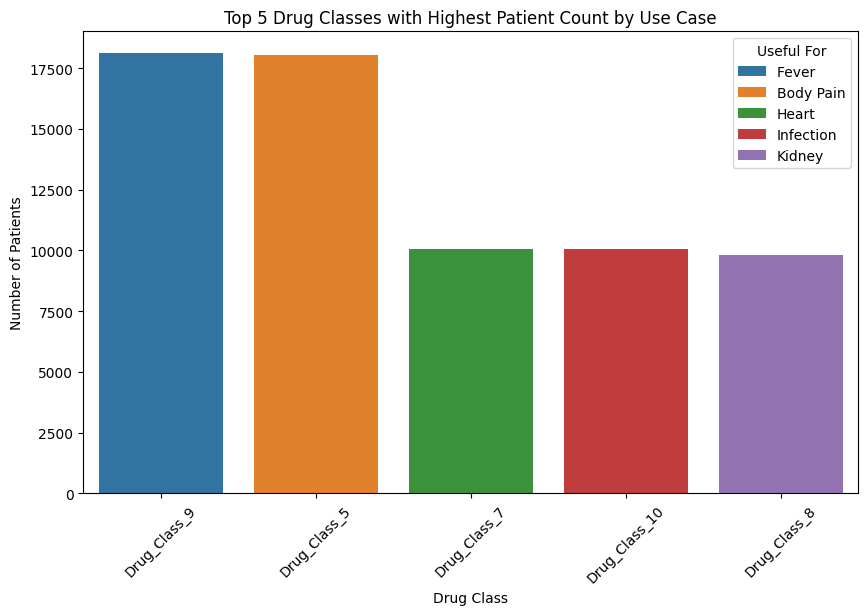

In [122]:
# TOP 5 DRUG CLASS WHICH GOT BENEFICIAL TO DISEASE

drougcount=dfaddi.groupby(["Drug_Class","Useful_For"]).agg({"Patient_ID":"count"}).nlargest(5,"Patient_ID")
drougcount = drougcount.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=drougcount, x="Drug_Class", y="Patient_ID", hue="Useful_For")
plt.xticks(rotation=45)
plt.xlabel("Drug Class")
plt.ylabel("Number of Patients")
plt.title("Top 5 Drug Classes with Highest Patient Count by Use Case")
plt.legend(title="Useful For")
plt.show()



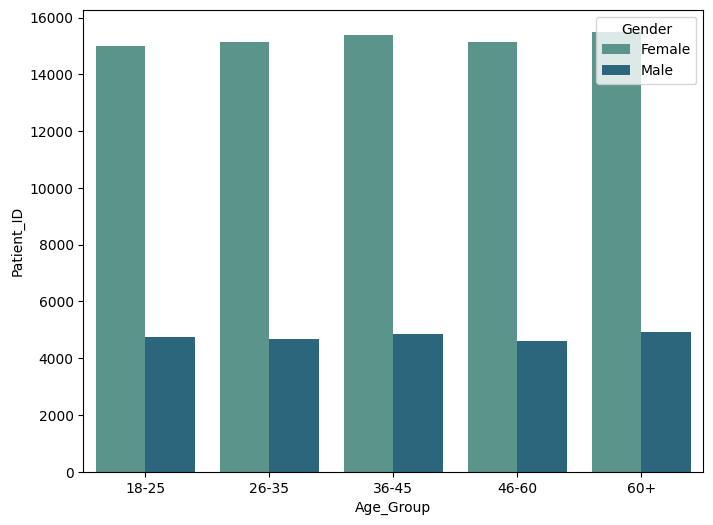

In [123]:
data=dfadpd.groupby(["Age_Group","Gender"]).agg({"Patient_ID":"count"})
data
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=data, x="Age_Group", y="Patient_ID", palette="crest",hue="Gender")

# DEEP ANALYSIS

Q1. WHICH TYPE OF REACTION IS MORE COMMON IN PATIENTS AND HOW THEY AFFECTING ON PATIENT?

ANS - Headache & Vomiting is the most common reaction. Some reactions have a high percentage of severe cases (Finded top drugs which are containing most Headache and Vomiting with total patient count)

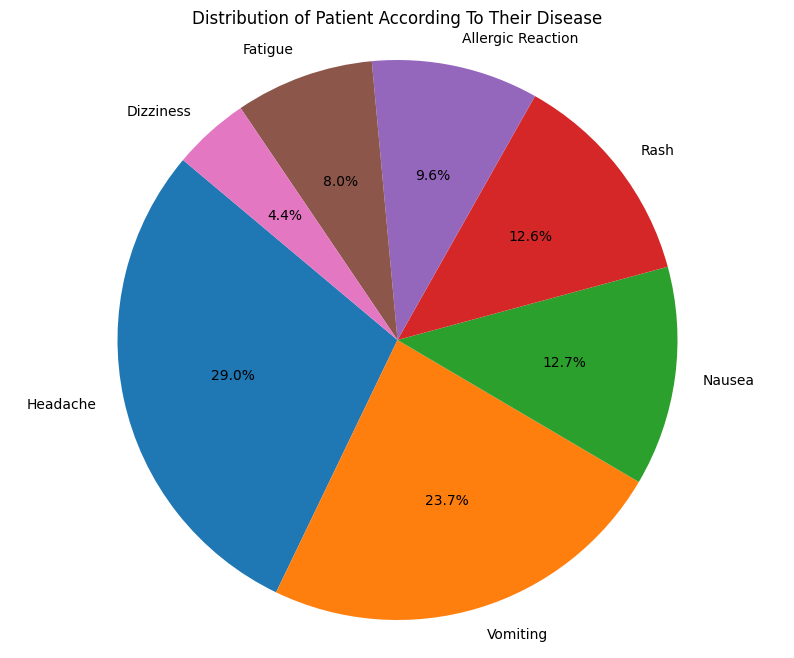

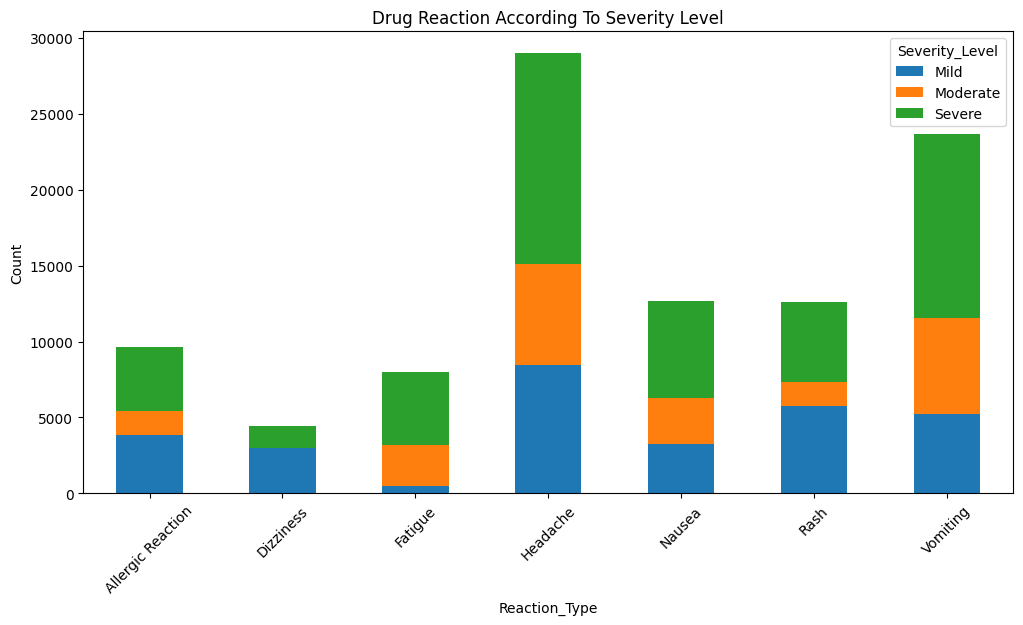

In [136]:
# WHICH TYPE OF REACTION IS MORE COMMON IN PATIENTS AND HOW THEY AFFECTING ON PATIENT?

# 1 Distribution of Patient According To Their Disease

Disease = dfaddi['Reaction_Type'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(Disease, labels=Disease.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Patient According To Their Disease')
plt.axis('equal')
plt.show()

age_gender_counts = dfadpd.groupby(['Reaction_Type', 'Severity_Level']).size().unstack()
age_gender_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# 2 Drug Reaction According To Severity Level

plt.title('Drug Reaction According To Severity Level')
plt.xlabel('Reaction_Type')
plt.ylabel('Count')
plt.legend(title='Severity_Level')
plt.xticks(rotation=45)
plt.show()

Q2. WHICH DRUG CLASSES ARE EFFECTIVE FOR PATIENTS, AND WHICH ONES HAVE RESULTED IN FATAL OVER TIME?

ANS - FATALED –
Drug class 7 takes a lot of days to show results, but ultimately leads to fatal outcomes.
Drug classes 5, 6, and 2 take less time to show results compared to other drug classes, but their outcomes are still fatal.
RESOLVED –
Most drug classes take a similar amount of time to show results.
Drug classes 8 and 10 take less time to show results, making them better than others in terms of effectiveness.



C:\Users\athrv\AppData\Local\Temp\ipykernel_6488\1115791885.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Drug_Class", y="Duration_Days", data=k, palette="coolwarm")


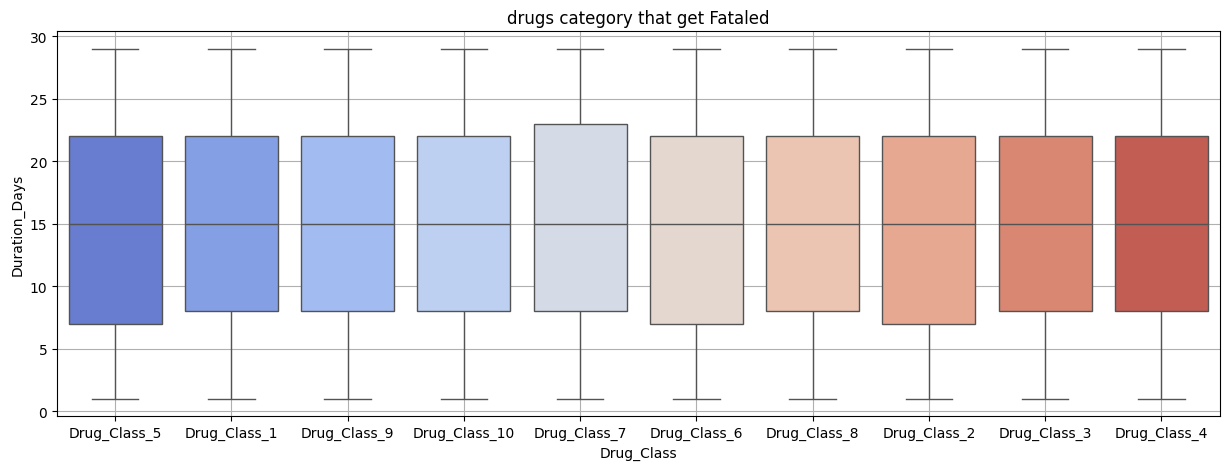

C:\Users\athrv\AppData\Local\Temp\ipykernel_6488\1115791885.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Drug_Class", y="Duration_Days", data=k, palette="coolwarm")


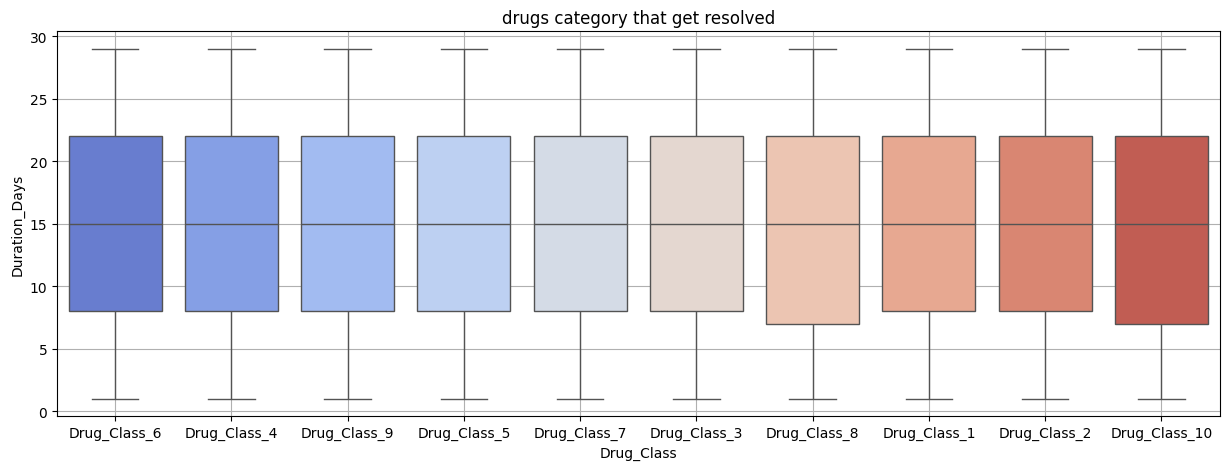

In [125]:
# WHICH DRUG CLASSES ARE EFFECTIVE FOR PATIENTS, AND WHICH ONES HAVE RESULTED IN FATAL OVER TIME?

# 1

plt.figure(figsize=(15, 5))
k = dfaddi.groupby("Outcome").get_group("Fatal")
sns.boxplot(x="Drug_Class", y="Duration_Days", data=k, palette="coolwarm")

plt.title('drugs category that get Fataled')
plt.grid()
plt.show()

# 2

plt.figure(figsize=(15, 5))
k = dfaddi.groupby("Outcome").get_group("Resolved")
sns.boxplot(x="Drug_Class", y="Duration_Days", data=k, palette="coolwarm")

plt.title('drugs category that get resolved')
plt.grid()
plt.show()

Q3. WHAT WAS THE SEVERITY LEVEL OF THE DRUGS GIVEN TO PATIENTS?

ANS - Most drugs are severe, meaning they cause strong side effects and need improvement for better results. Some drugs have mild effects, which is good, but their effectiveness should still be checked. Very few drugs fall in the moderate category, which means there’s an imbalance. 


C:\Users\athrv\AppData\Local\Temp\ipykernel_6488\1567893249.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, y='Severity_Level', palette='viridis')


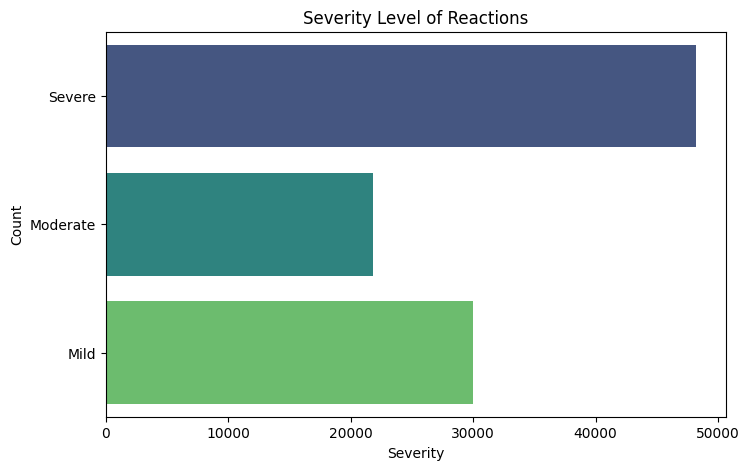

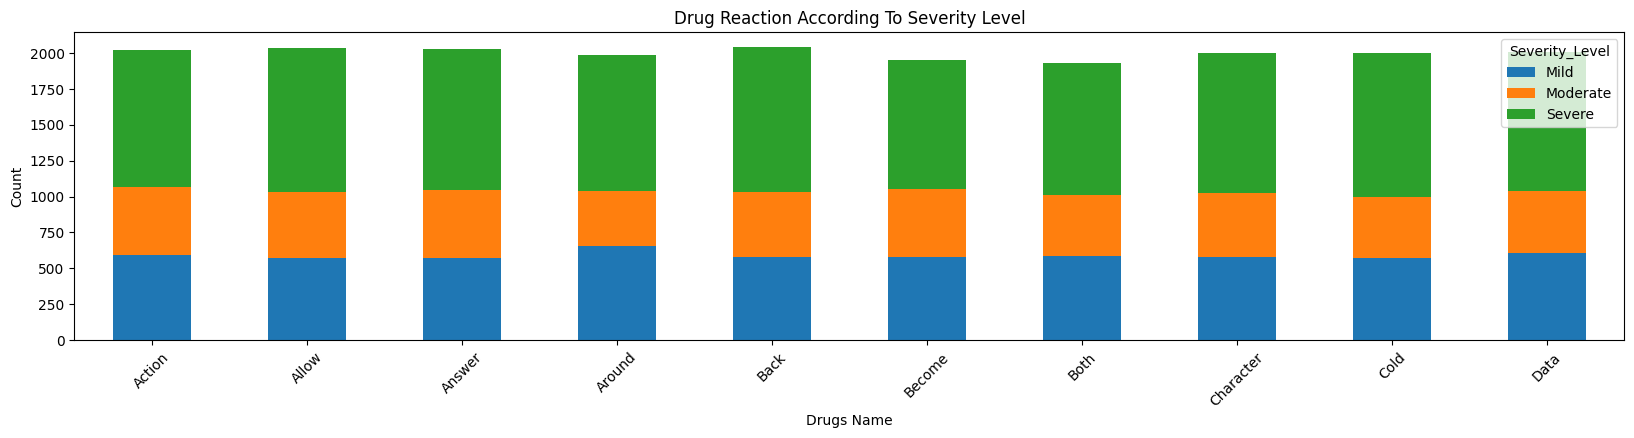

In [126]:
# WHAT WAS THE SEVERITY LEVEL OF THE DRUGS GIVEN TO PATIENTS?

# 1

plt.figure(figsize=(8, 5))
sns.countplot(data=df1, y='Severity_Level', palette='viridis')
plt.title('Severity Level of Reactions')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

# 2

age_gender_counts = dfaddi.groupby(['Drug_Name', 'Severity_Level']).size().unstack().head(10)
age_gender_counts.plot(kind='bar', stacked=True, figsize=(20, 4))


plt.title('Drug Reaction According To Severity Level')
plt.xlabel('Drugs Name')
plt.ylabel('Count')
plt.legend(title='Severity_Level')
plt.xticks(rotation=45)
plt.show()

Q4. HOW DRUGS ARE AFFECTING PATIENTS BASED ON THEIR SEVERITY LEVELS AND FINAL OUTCOMES ?

ANS - Most severe reactions are linked to headaches and vomiting. The number of resolved and unresolved cases is similar across many reaction types. Dizziness has the low impact compared to other reaction types. Some reactions, like fatigue and nausea, show a balanced distribution across severity levels.


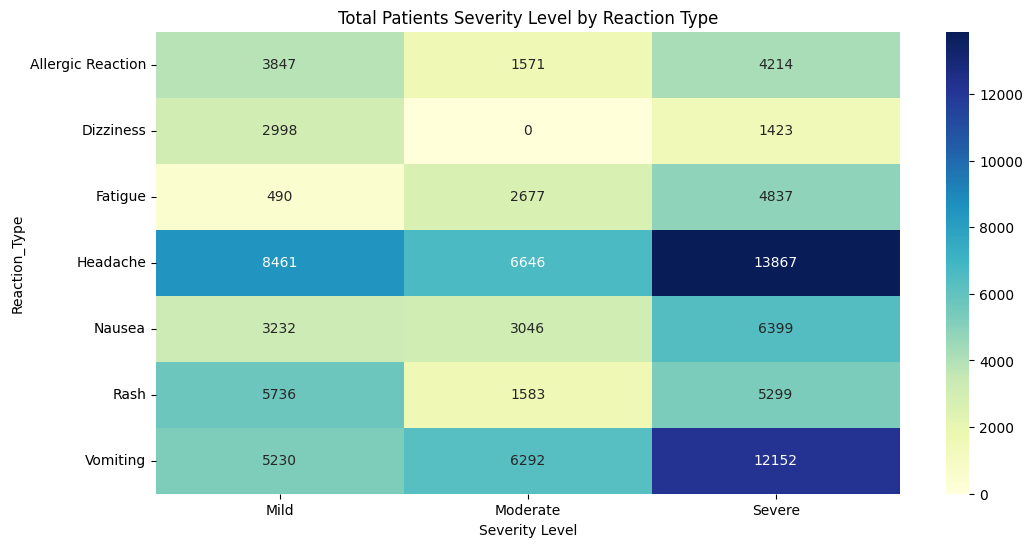

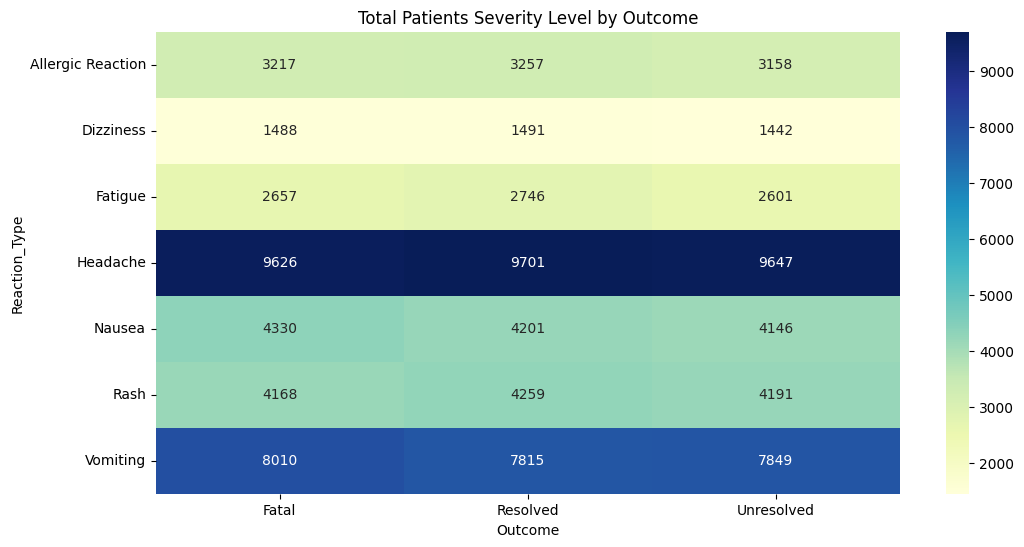

In [127]:
# HOW DRUGS ARE AFFECTING PATIENTS BASED ON THEIR SEVERITY LEVELS AND FINAL OUTCOMES ?

# 1

severity_drug_counts = dfaddi.groupby(['Reaction_Type', 'Severity_Level']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(severity_drug_counts, annot=True, fmt='d', cmap='YlGnBu')  # 'd' works as all values are integers
plt.title('Total Patients Severity Level by Reaction Type')
plt.xlabel('Severity Level')
plt.ylabel('Reaction_Type')
plt.show()

# 2

severity_drug_counts = dfaddi.groupby(['Reaction_Type', 'Outcome']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(severity_drug_counts, annot=True, fmt='d', cmap='YlGnBu')  # 'd' works as all values are integers
plt.title('Total Patients Severity Level by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Reaction_Type')
plt.show()


Q5. WHICH DRUGS ARE WORKING WELL, WHICH ARE NOT, AND WHICH ONES ARE STILL BEING OBSERVED?

ANS - RESOLVED - These drugs have successfully treated patients, leading to a resolved outcome. FATAL - These drugs indicating poor effectiveness or severe side effects. UNRESOLVED - These drugs have uncertain results, meaning their effectiveness is yet to be determined.

C:\Users\athrv\AppData\Local\Temp\ipykernel_6488\3684971783.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, y='Outcome', palette='viridis')


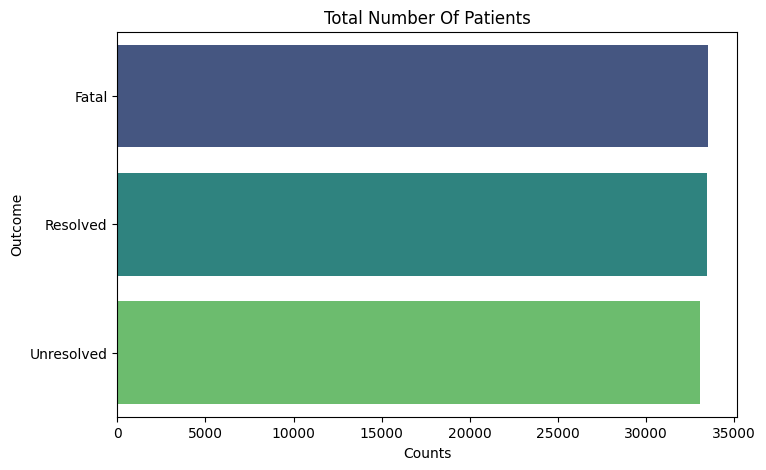

,,Patient_ID
Drug_Name,Outcome,
Indeed,Resolved,727
Industry,Resolved,708
Game,Resolved,701
Old,Resolved,701
Support,Resolved,701
Cold,Resolved,700
Prepare,Resolved,697
Through,Resolved,697
Yet,Resolved,696


,,Patient_ID
Drug_Name,Outcome,
Eight,Fatal,729
Measure,Fatal,724
Pressure,Fatal,720
Back,Fatal,717
Action,Fatal,713
Different,Fatal,700
Sing,Fatal,699
Such,Fatal,695
Study,Fatal,692


,,Patient_ID
Drug_Name,Outcome,
Require,Unresolved,721
Paper,Unresolved,710
Indeed,Unresolved,696
Sense,Unresolved,695
Answer,Unresolved,681
Data,Unresolved,681
Free,Unresolved,681
Summer,Unresolved,681
Character,Unresolved,679


In [128]:
# WHICH DRUGS ARE WORKING WELL, WHICH ARE NOT, AND WHICH ONES ARE STILL BEING OBSERVED?

from IPython.display import display

plt.figure(figsize=(8, 5))
sns.countplot(data=df1, y='Outcome', palette='viridis')
plt.title('Total Number Of Patients')
plt.xlabel('Counts')
plt.ylabel('Outcome')
plt.show()

# top 10 Drug Names for "Resolved" Outcome
data_resolved = dfaddi.groupby("Outcome").get_group("Resolved")
drougcount_resolved = data_resolved.groupby(["Drug_Name", "Outcome"]).agg({"Patient_ID": "count"}).nlargest(10, "Patient_ID")

# top 10 Drug Names for "Fatal" Outcome
data_fatal = dfaddi[dfaddi["Outcome"] == "Fatal"]
drougcount_fatal = data_fatal.groupby(["Drug_Name", "Outcome"]).agg({"Patient_ID": "count"}).nlargest(10, "Patient_ID")

# top 10 Drug Names for "Unresolved" Outcome
data_unresolved = dfaddi.groupby("Outcome").get_group("Unresolved")
drougcount_unresolved = data_unresolved.groupby(["Drug_Name", "Outcome"]).agg({"Patient_ID": "count"}).nlargest(10, "Patient_ID")

display(drougcount_resolved, drougcount_fatal, drougcount_unresolved)



Q6. WHICH DRUG CLASSES HAVE MORE SIDE EFFECTS AND SHOW THEIR IMPACT ON PATIENTS?

ANS - The Drug class 9 & 5 contains more size effect on patient. Drug class 2,1 contains low side effects as compare to others. The side effects are happening most they need medician if they the happen we can give medicine to patient immedialty

C:\Users\athrv\AppData\Local\Temp\ipykernel_6488\3768365282.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=m, y="Drug_Class",x="Side_Effects" ,palette="rocket")
C:\Users\athrv\AppData\Local\Temp\ipykernel_6488\3768365282.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=side_effects.values, y=side_effects.index, palette='coolwarm')


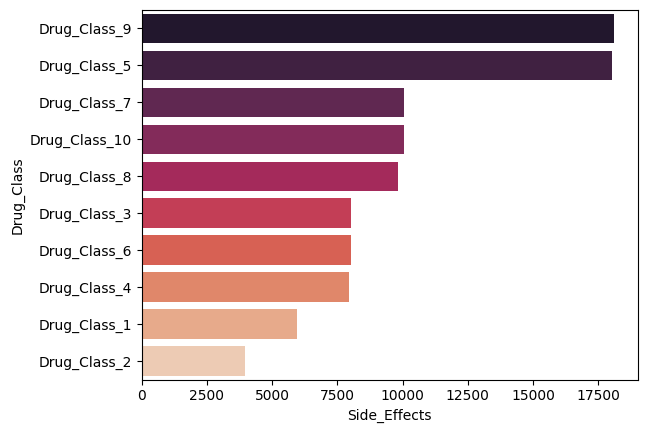

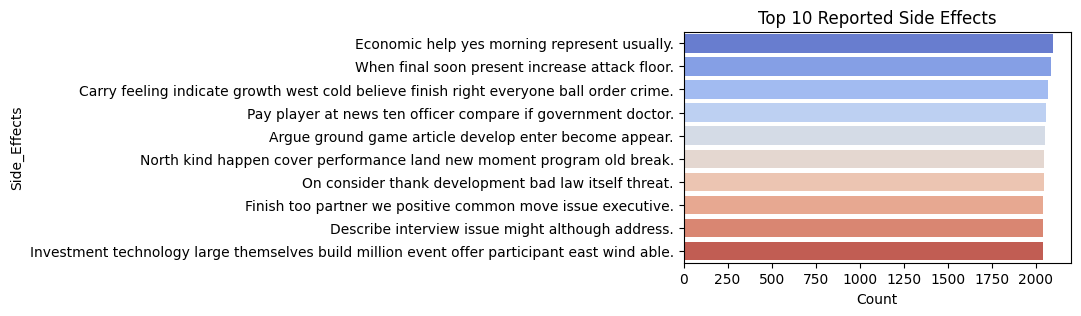

In [129]:
# WHICH DRUG CLASSES HAVE MORE SIDE EFFECTS AND SHOW THEIR IMPACT ON PATIENTS?

m=dfaddi.groupby(["Drug_Class"]).agg({"Side_Effects":"count"})
m=m.nlargest(10,"Side_Effects")
sns.barplot(data=m, y="Drug_Class",x="Side_Effects" ,palette="rocket")

side_effects = dfaddi['Side_Effects'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(5, 3))
sns.barplot(x=side_effects.values, y=side_effects.index, palette='coolwarm')
plt.title('Top 10 Reported Side Effects')
plt.xlabel('Count')
plt.show()

Q7. WHICH DOSAGE TYPE ARE USING MOST & WHICH DOSAGE FORM GIVING MORE RELIEF TO PATIENT AND WHICH ONE NOT?

ANS - The cream, capsule and talets are used most instread of syrup and injection. All dosage are giving same result but injection and cream resolved most of the cases. Tablet is more fataled they need improvements.


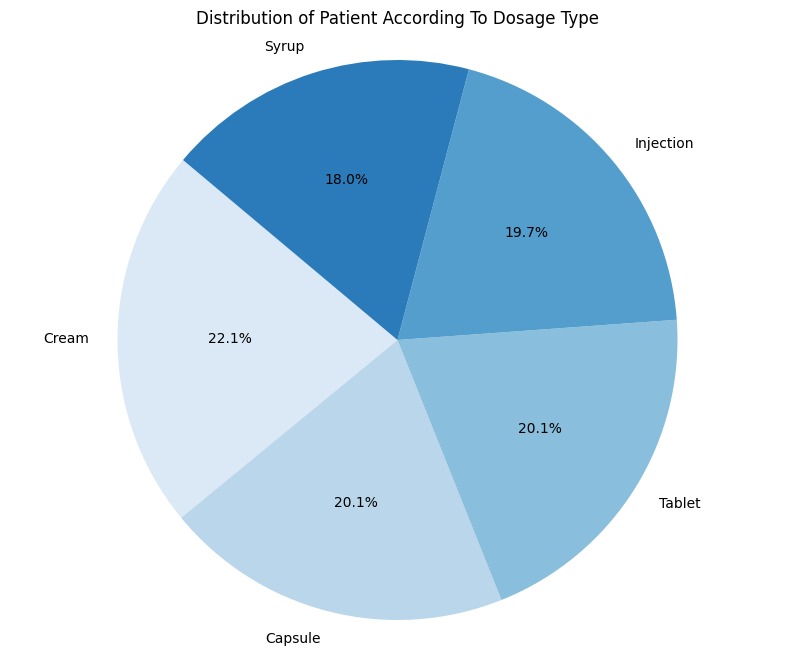

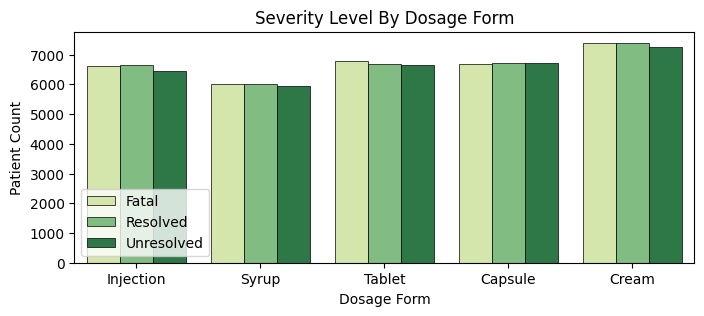

In [130]:
# WHICH DOSAGE TYPE ARE USING MOST & WHICH DOSAGE FORM GIVING MORE RELIEF TO PATIENT AND WHICH ONE NOT?

Disease = dfaddi['Dosage_Form'].value_counts()
colors = sns.color_palette("Blues")
plt.figure(figsize=(10, 8))
plt.pie(Disease, labels=Disease.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Patient According To Dosage Type')
plt.axis('equal')
plt.show()

plt.figure(figsize=(8,3))
ax = sns.countplot(data=dfaddi, x='Dosage_Form', hue='Outcome', palette="YlGn", edgecolor='black', linewidth=0.5)
plt.title('Severity Level By Dosage Form')
plt.xlabel('Dosage Form')
plt.ylabel('Patient Count')
plt.legend(loc=3)
plt.show()

Q8. HOW ARE REACTIONS CHANGING OVER THE YEARS, QUARTERS, AND MONTHS?

ANS - The number of reactions is mostly stable, but in Q1 of each year, it drops by around 10-20%. The reaction counts remain consistent across the years, but in 2024, there are no records after October. Reaction counts drop in September and stabilize after January.

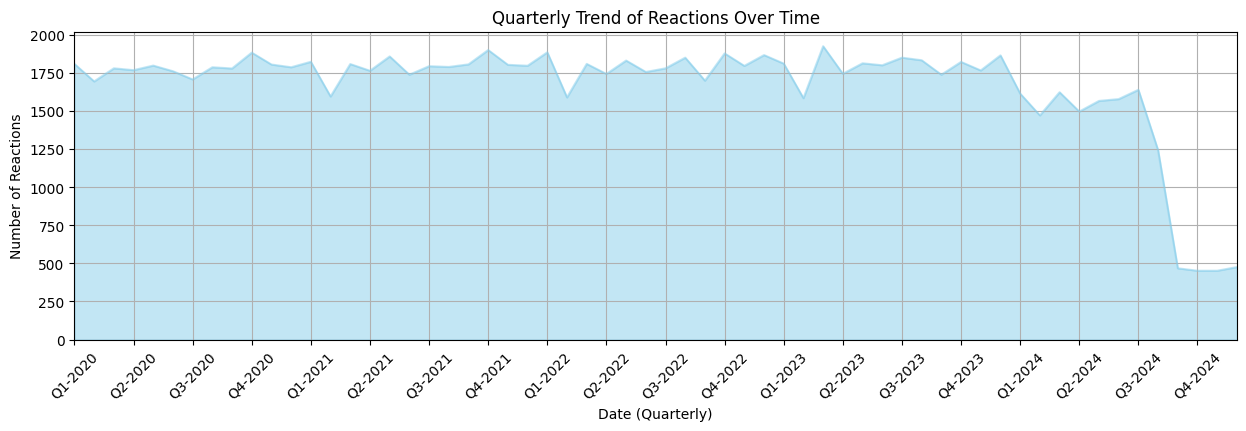

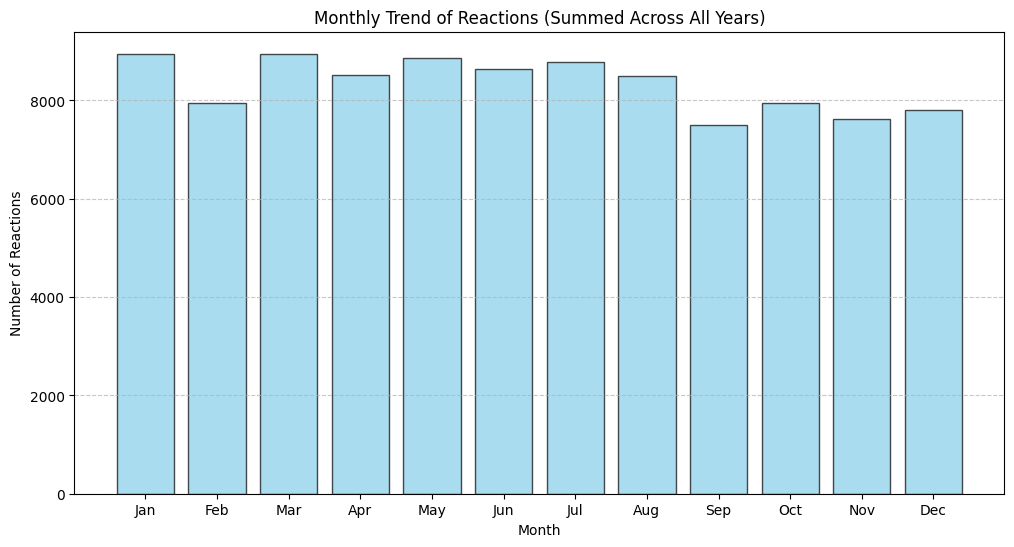

In [131]:
# HOW ARE REACTIONS CHANGING OVER THE YEARS, QUARTERS, AND MONTHS?

dfaddi['Date_of_Reaction'] = pd.to_datetime(dfaddi['Date_of_Reaction'])
reactions_over_time = dfaddi.groupby(dfaddi['Date_of_Reaction'].dt.to_period('M')).size()
reactions_over_time.index = reactions_over_time.index.to_timestamp()
plt.figure(figsize=(15, 4))
reactions_over_time.plot(kind='area', alpha=0.5, color='skyblue')
plt.title('Quarterly Trend of Reactions Over Time')
plt.xlabel('Date (Quarterly)')
plt.ylabel('Number of Reactions')
plt.grid()
plt.xticks(reactions_over_time.index[::3], 
           [f'Q{(m.month-1)//3+1}-{m.year}' for m in reactions_over_time.index[::3]], 
           rotation=45)
plt.show()


dfaddi['Date_of_Reaction'] = pd.to_datetime(dfaddi['Date_of_Reaction'])
reactions_over_time = dfaddi.groupby(dfaddi['Date_of_Reaction'].dt.month).size()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(12, 6))
plt.bar(months, reactions_over_time, color='skyblue', alpha=0.7, edgecolor="black",linewidth=1)
plt.title('Monthly Trend of Reactions (Summed Across All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Reactions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Q9. HOW ARE SEVERITY LEVELS DISTRIBUTED ACROSS GENDERS AND DIFFERENT AGE GROUPS?

ANS - The majority of cases (76.2%) are female, while 23.8% are male. Females have a higher number of cases overall, particularly severe ones. Across all age groups females have a higher count of cases compared to males.


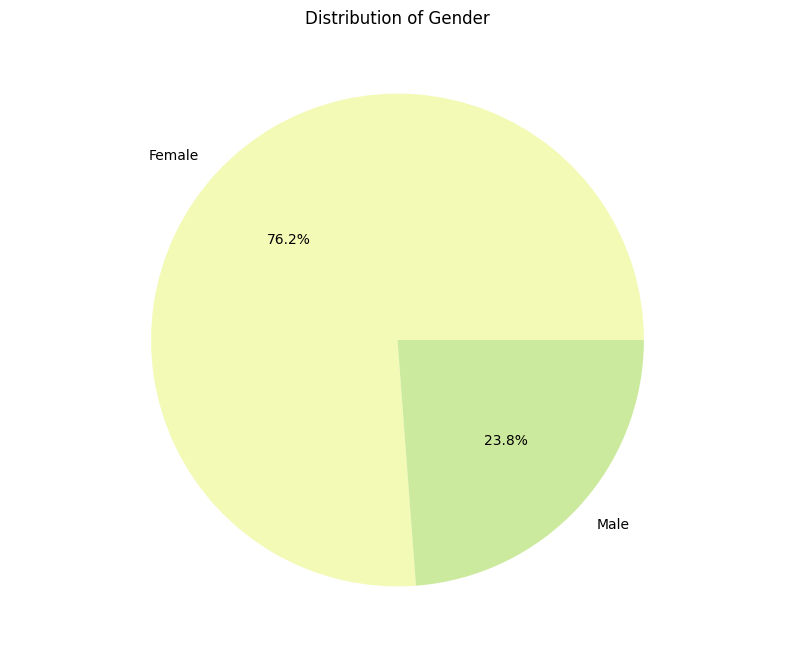

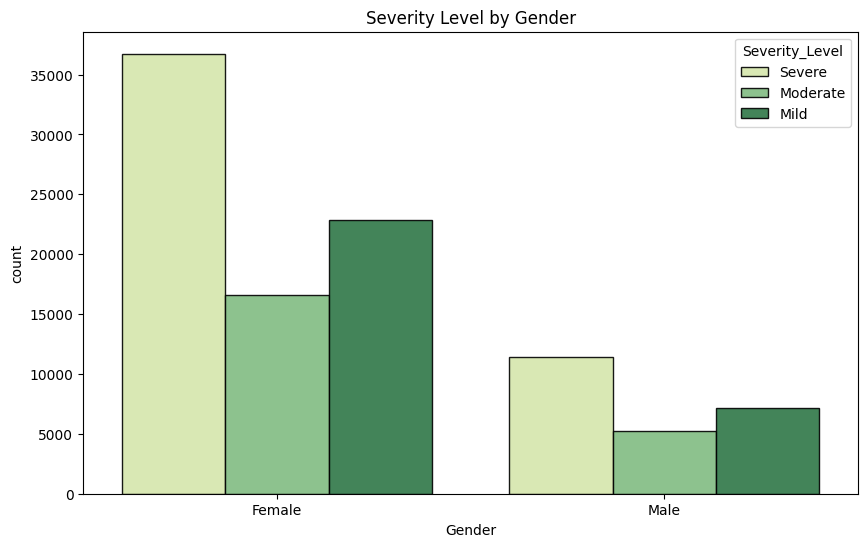

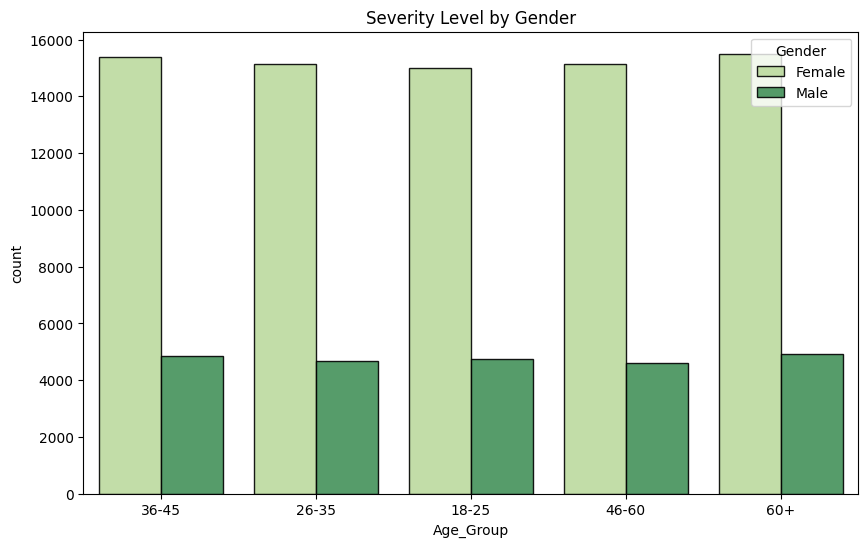

In [132]:
# HOW ARE SEVERITY LEVELS DISTRIBUTED ACROSS GENDERS AND DIFFERENT AGE GROUPS?

gender= dfadpd['Gender'].value_counts()
plt.figure(figsize=(10,8))
colors = sns.color_palette("YlGn")
plt.title('Distribution of Gender')
plt.axis('equal')
plt.pie(gender, labels=gender.index,autopct='%1.1f%%',colors=colors)
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=dfadpd, x='Gender', hue='Severity_Level',palette="YlGn",edgecolor="black",linewidth=1,alpha=0.9)
plt.title('Severity Level by Gender')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=dfadpd, x='Age_Group', hue='Gender',palette="YlGn",edgecolor="black",linewidth=1,alpha=0.9)
plt.title('Severity Level by Gender')
plt.show()

Q10. WHICH DRUG MANUFACTURER IS PERFORMING WELL, AND WHICH ONE IS NOT PERFORMING WELL?

ANS - Some manufacturers have high counts in both fatal and resolved outcomes, indicating a mixed performance. Manufacturers with a high number of resolved cases may be performing well, while those with high fatal cases may not be performing as effectively.


C:\Users\athrv\AppData\Local\Temp\ipykernel_6488\1871767463.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=k, y="Manufacturer", x="Patient_ID", palette="Reds", edgecolor="black", linewidth=1)


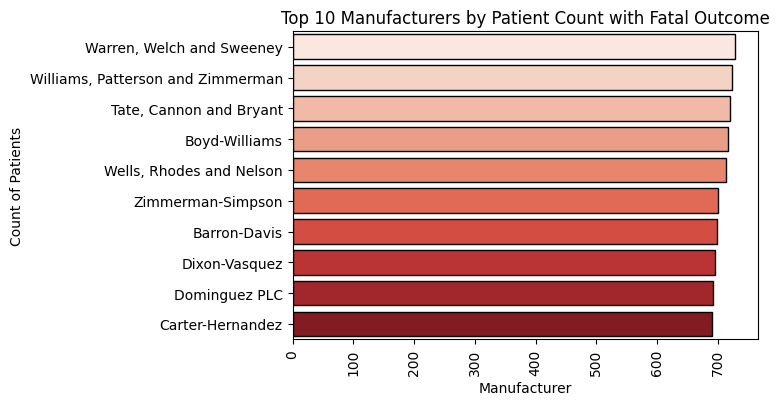

C:\Users\athrv\AppData\Local\Temp\ipykernel_6488\1871767463.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=k, y="Manufacturer", x="Patient_ID",palette="YlGn", edgecolor="black", linewidth=1)


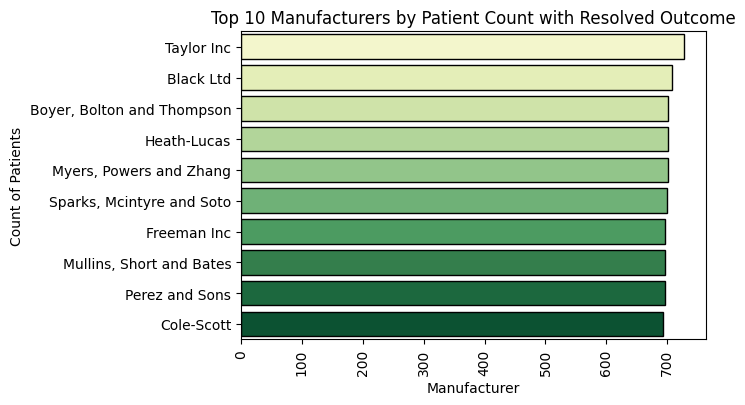

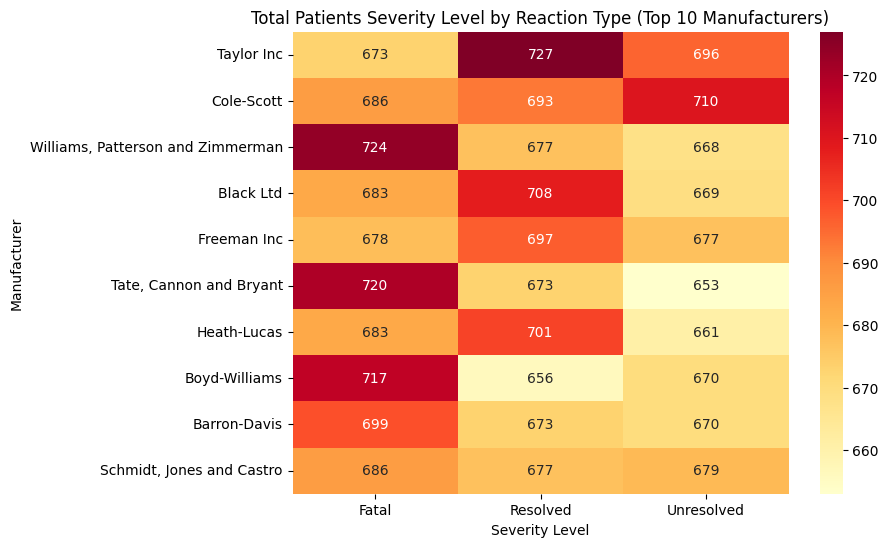

In [133]:
# WHICH DRUG MANUFACTURER IS PERFORMING WELL, AND WHICH ONE IS NOT PERFORMING WELL?

k = dfaddi.groupby("Outcome").get_group("Fatal")
k = k.groupby("Manufacturer").agg({"Patient_ID": "count"}).nlargest(10, "Patient_ID").reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=k, y="Manufacturer", x="Patient_ID", palette="Reds", edgecolor="black", linewidth=1)
plt.xticks(rotation=90)
plt.xlabel("Manufacturer")
plt.ylabel("Count of Patients")
plt.title("Top 10 Manufacturers by Patient Count with Fatal Outcome")
plt.show()


k = dfaddi.groupby("Outcome").get_group("Resolved")
k = k.groupby("Manufacturer").agg({"Patient_ID": "count"}).nlargest(10, "Patient_ID").reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=k, y="Manufacturer", x="Patient_ID",palette="YlGn", edgecolor="black", linewidth=1)
plt.xticks(rotation=90)
plt.xlabel("Manufacturer")
plt.ylabel("Count of Patients")
plt.title("Top 10 Manufacturers by Patient Count with Resolved Outcome")
plt.show()

severity_drug_counts = dfaddi.groupby(['Manufacturer', 'Outcome']).size().unstack(fill_value=0)
top_10_manufacturers = severity_drug_counts.sum(axis=1).nlargest(10).index
severity_drug_counts = severity_drug_counts.loc[top_10_manufacturers]
plt.figure(figsize=(8, 6))
sns.heatmap(severity_drug_counts, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Total Patients Severity Level by Reaction Type (Top 10 Manufacturers)')
plt.xlabel('Severity Level')
plt.ylabel('Manufacturer')
plt.show()


# Conclusion

In this analysis, we explored how different drugs react to patients by examining patterns in the dataset. we identified key insights related to drug effectiveness, patient demographics, and potential side effects. This analysis can assist the medical research team in making data-driven decisions, improving patient outcomes, and enhancing drug effectiveness. Future research can further refine these insights by incorporating more diverse datasets and advanced machine learning techniques.

